In [3]:
import tensorflow as tf
import magenta as mg
import numpy as np
import sys

from magenta.common import tf_lib

In [4]:
RL_CODE_PATH = "/home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner"

In [5]:
sys.path.append(RL_CODE_PATH)
import rl_tuner
import rl_tuner_ops

In [6]:
# File locations
CHECKPOINT_DIR = RL_CODE_PATH + '/testdata'
CHECKPOINT_FILE = CHECKPOINT_DIR + '/model.ckpt-1994'
MIDI_PRIMER = RL_CODE_PATH + '/testdata/primer.mid'
TRAINING_DATA_PATH = ''
SAVE_PATH = "/home/natasha/Dropbox (MIT)/Google/RL-RNN-Project/rl_rnn_output"

In [7]:
# Model parameter settings
hparams = rl_tuner_ops.small_model_hparams()
ALGORITHM = 'q'
REWARD_SCALER = 1
OUTPUT_EVERY_NTH = 50000
NUM_NOTES_IN_COMPOSITION = 32
PRIME_WITH_MIDI = False

In [8]:
rl_tuner_hparams = tf_lib.HParams(random_action_probability=0.1,
                                  store_every_nth=1,
                                  train_every_nth=5,
                                  minibatch_size=32,
                                  discount_rate=0.5,
                                  max_experience=100000,
                                  target_network_update_rate=0.01)

## Train network

In [9]:
reload(rl_tuner_ops)
reload(rl_tuner)
rl_tuner.reload_files()

In [11]:
rl_net = rl_tuner.RLTuner(SAVE_PATH, CHECKPOINT_DIR, MIDI_PRIMER, 
                          dqn_hparams=rl_tuner_hparams, 
                          algorithm=ALGORITHM,
                          reward_scaler=REWARD_SCALER,
                          output_every_nth=OUTPUT_EVERY_NTH, 
                          training_file_list=[TRAINING_DATA_PATH],
                          backup_checkpoint_file=CHECKPOINT_FILE,
                          custom_hparams=hparams,
                          num_notes_in_melody=NUM_NOTES_IN_COMPOSITION)

checkpoint dir /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/train
can't find checkpoint file, using backup, which is /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/model.ckpt-1994
checkpoint file /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/model.ckpt-1994
checkpoint dir /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/train
can't find checkpoint file, using backup, which is /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/model.ckpt-1994
checkpoint file /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/model.ckpt-1994
checkpoint dir /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/train
can't find checkpoint file, using backup, which is /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/model.ckpt-1994
checkpoint file /home/na

Generated sequence: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


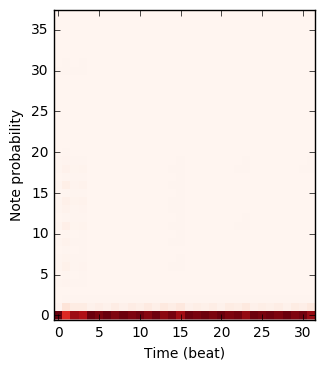

In [12]:
# Generate initial music sequence before training with RL
rl_net.generate_music_sequence(visualize_probs=True, title='pre_rl', length=32)

In [13]:
rl_net.train(num_steps=1000000, exploration_period=500000)

Evaluating initial model...
Evaluating model...
Training iteration 50000
	Reward for last 50000 steps: -273069.924819
		Music theory reward: -20230.5685772
		Note RNN reward: -252839.356242
	Exploration probability is 0.9042382
Evaluating model...
Training iteration 100000
	Reward for last 50000 steps: -254587.212057
		Music theory reward: -11063.3126697
		Note RNN reward: -243523.899388
	Exploration probability is 0.8084782
Evaluating model...
Training iteration 150000
	Reward for last 50000 steps: -234957.717806
		Music theory reward: -2219.31592438
		Note RNN reward: -232738.401881
	Exploration probability is 0.7127182
Evaluating model...
Training iteration 200000
	Reward for last 50000 steps: -213339.992464
		Music theory reward: 7204.18554339
		Note RNN reward: -220544.178008
	Exploration probability is 0.6169582
Evaluating model...
Training iteration 250000
	Reward for last 50000 steps: -193481.302129
		Music theory reward: 10024.3737517
		Note RNN reward: -203505.675881
	Explora

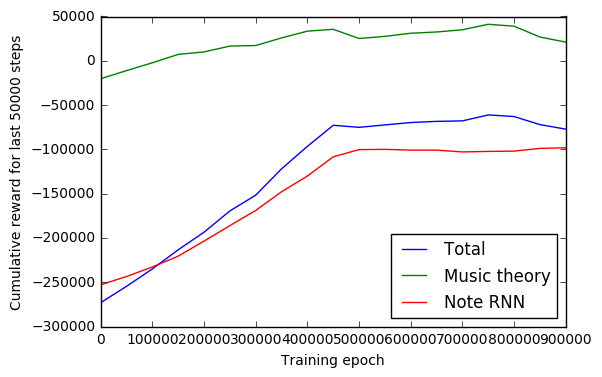

In [14]:
# Plot the rewards received during training. Improves as exp
rl_net.plot_rewards()

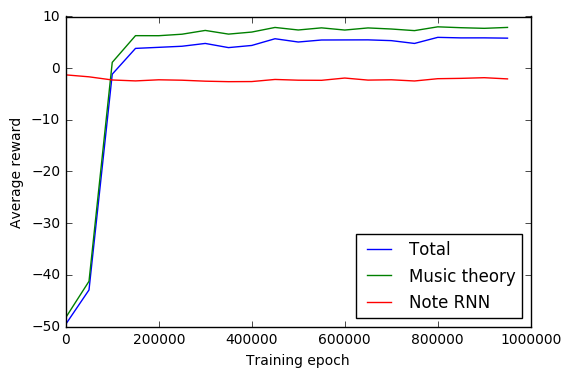

In [15]:
rl_net.plot_evaluation()

Generated sequence: [0, 0, 1, 23, 0, 0, 18, 18, 21, 0, 26, 0, 0, 1, 19, 0, 14, 0, 12, 0, 14, 0, 18, 0, 6, 0, 11, 0, 16, 0, 14, 0]


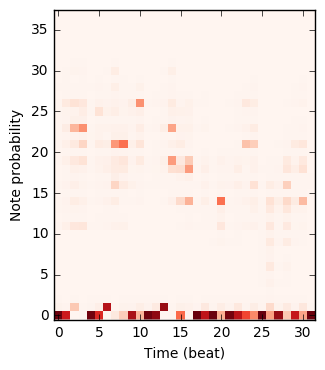

In [16]:
rl_net.generate_music_sequence(visualize_probs=True, title='post_rl')

In [17]:
# If you're happy with the model, save a version!
rl_net.save_model(SAVE_PATH, 'my_cool_model')